<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Types-of-calculate" data-toc-modified-id="Using-the-scripting-interface-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Types of calculate</a></span><ul class="toc-item"><li><span><a href="#Calculate-by-third-octave" data-toc-modified-id="Calculate-by-third-octave-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Calculate by third octave</a></span></li><li><span><a href="#Calculate-by-time-samples" data-toc-modified-id="Calculate-by-time-samples-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Calculate by time samples</a></span></li></ul></li><li><span><a href="#Functions-of-the-sound-level-meter" data-toc-modified-id="Functions-of-the-sound-level-meter-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Functions of the sound level meter</a></span><ul class="toc-item"><li><span><a href="#Leq" data-toc-modified-id="Leq-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Leq</a></span></li><li><span><a href="#LAeq" data-toc-modified-id="LAeq-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>LAeq</a></span></li><li><span><a href="#LCeq" data-toc-modified-id="LCeq-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>LCeq</a></span></li><li><span><a href="#Max_level" data-toc-modified-id="Max_level-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Max_level</a></span><ul class="toc-item"><li><span><a href="#max_level_3oct" data-toc-modified-id="#max_level_3oct">max_level_3oct</a></span></li><li><span><a href="#max_level" data-toc-modified-id="#max_level">max_level</a></span></li></ul></li><li><span><a href="#Min_level" data-toc-modified-id="Min_level-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Min_level</a></span><ul class="toc-item"><li><span><a href="#min_level_3oct" data-toc-modified-id="#min_level_3oct">min_level_3oct</a></span></li><li><span><a href="#min_level" data-toc-modified-id="#min_level">min_level</a></span></li></ul></li><li><span><a href="#Percentile" data-toc-modified-id="Percentile-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Percentile</a></span><ul class="toc-item"><li><span><a href="#LN_3oct" data-toc-modified-id="#LN_3oct">LN_3oct</a></span></li><li><span><a href="#LN" data-toc-modified-id="#LN">LN</a></span></li></ul></li></ul></li></ul></div>


# How to compute the functions of sound level meter
This tutorial explains how to use MOSQITO to compute the functions of the sound level meter. There are two types of functions: Those that work with third octaves and those that work with time samples. Users can calculate either by focusing on frequency bands or by focusing on representative values of a signal. 

## Types of calculate
### Calculate by third octave 
In this tutorial the calculations are made for each frequency band for which you want to know the result. Choose a frequency band and look at the values have this band in the differents samples. With this values (db) is calculate the frequency band functions of this sound level meter. Will return an array with as many values as frequency bands have been calculated, one result for each frequency band. This functions are recognized because they have the suffix "_3oct" written in the name (they do not have to be the third octave bands, they can be any band that you want to calculate).

An input array is needed, each column needs to be a sample of the signal. In each column there will be as many rows as there are frequency bands of the samples. Let's create an input array for these functions: 

In [1]:
# Third party imports
import numpy as np

# import Mosqito funtions
from mosqito.functions.oct3filter.calc_third_octave_levels import calc_third_octave_levels
from mosqito.functions.shared.load import load

# Define path to the .wav file
# To be replaced by your own path
path = "../tests/input/1KHZ60DB.WAV"

# load and obtain the signal data and its sampling frequency.
sig_3oct, fs_3oct = load(True, path, calib=1)

# With the values of the time samples (in Pa), the corresponding 28 thirds of an octave are formed (from 25 Hz to 12500 Hz).
# Return the frecuency bands. 
spectrum_signal_samples = calc_third_octave_levels(sig_3oct,fs_3oct)[0]
# Return the frecuecy of the bands.
freq_3oct = np.array(calc_third_octave_levels(sig_3oct,fs_3oct)[1])

This is what the sample input array with 28 third-octave bands (25 Hz - 12500 Hz) looks like:

In [2]:
# A tone of 60 dB in 1000 HZ : 
print(spectrum_signal_samples)
print("---------------------------")
print(freq_3oct)

[[-26.02059991 -26.02059991 -26.0205999  ... -26.02049808 -26.02049808
  -26.02049808]
 [-26.02059991 -26.02059991 -26.0205998  ... -26.02019363 -26.02019363
  -26.02019363]
 [-26.02059991 -26.02059991 -26.02059899 ... -26.01897698 -26.01897698
  -26.01897698]
 ...
 [-26.02059991   7.36960663  15.69119605 ... -20.59397137 -20.59397137
  -20.59397137]
 [-26.02059991   6.96789178  13.69061076 ... -13.84819227 -13.84819227
  -13.84819227]
 [-26.02059991   5.95895375  11.59240331 ... -19.20758803 -19.20758803
  -19.20758803]]
---------------------------
[   25.     31.5    40.     50.     63.     80.    100.    125.    160.
   200.    250.    315.    400.    500.    630.    800.   1000.   1250.
  1600.   2000.   2500.   3150.   4000.   5000.   6300.   8000.  10000.
 12500. ]


### Calculate by time samples
In this tutorial for the calculations all temporary samples collected are used. Each sample is collected in a time and has its value. With this values (db) is calculate the signal functions of this sound level meter. Will return an array with the value have been calculated, the calculations are made for all samples so it is only a representative or generic value for the input signal.

An input array is needed, all the values in dB of the time samples of a signal must be on the same row. Let's create an input array for these functions:  

In [3]:
# Third party imports
import math

# load and obtain the signal data and its sampling frequency.
sig, fs = load(True, path, calib=1)

spectrum_signal_samples_dB = calc_third_octave_levels(sig,fs)[0]
freq_dB = np.array(calc_third_octave_levels(sig,fs)[1])

# Creating a list of zeros of the size of the numbers of samples.
sig_dB = np.zeros(spectrum_signal_samples_dB.shape[1])
# For each sample you perform the operation.
for i in range(spectrum_signal_samples_dB.shape[1]): 
    sum = 0
    # Performs the summation with all the values of the frequency band in the same sample.
    for j in range(spectrum_signal_samples_dB.shape[0]):  
        # Operation: summation(10^(level(db)[i]/10))
        sum = sum + 10.0**(spectrum_signal_samples_dB[j][i]/10.0)
    # Keep the logarithmic sum value in the box corresponding to the sample from which the calculation is being made.
    # Operation: 10 x log(base 10)[sum]
    sig_dB[i] = 10.0 * math.log((sum),10)


This is how the input array for these functions finally has to look like. It is just an array with the values in dB of the level of each sample.

In [4]:
#A tone of 60 dB in 1000 HZ : 
print(sig_dB)

[-11.5490196   16.13412259  29.65476109 ...  64.05704916  64.05704916
  64.05704916]


## Functions of the sound level meter
Here explain all the functions available in the sound level meter and what array will each of them return. 
### Leq
This function is only available for calculation in frequency bands (_3oct).

Calculate the Leq of the frequency bands you choose, returns the calculated Leq values for each band. Each one is calculated with the levels (dB) of its band in the different samples. The function Leq_3oct uses the Leq formula.

In [5]:
# Creating a list of zeros of the size of the frequency bands (to keep the Leq values).
Leq_3oct = np.zeros(freq_3oct.shape)
# For each frequency band you perform the operation.
for i in range(freq_3oct.shape[0]): 
    sum = 0
    # Performs the summation with all the values of the frequency band in the different samples.
    for j in range(spectrum_signal_samples.shape[1]):  
        # Operation: summation(10^(level(db)[i]/10))
        sum = sum + 10.0**(spectrum_signal_samples[i][j]/10.0)
    # Keep the Leq value in the box corresponding to the frequency band from which the calculation is being made.
    # Operation: 10 x log(base 10)[1/number of samples x sum]
    Leq_3oct[i] = 10.0 * math.log(((1/spectrum_signal_samples.shape[1])*sum),10)

Returns Leq_3oct, which is an array with as many values as there are frequency bands being operated. In this example there are 28 Leq values. 

In [6]:
%whos

Variable                     Type        Data/Info
--------------------------------------------------
Leq_3oct                     ndarray     28: 28 elems, type `float64`, 224 bytes
calc_third_octave_levels     function    <function calc_third_octa<...>ls at 0x000001E0487FBDC0>
freq_3oct                    ndarray     28: 28 elems, type `float64`, 224 bytes
freq_dB                      ndarray     28: 28 elems, type `float64`, 224 bytes
fs                           int         48000
fs_3oct                      int         48000
i                            int         27
j                            int         9999
load                         function    <function load at 0x000001E04A769CA0>
math                         module      <module 'math' (built-in)>
np                           module      <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
path                         str         ../tests/input/1KHZ60DB.WAV
sig                          ndarray     240000: 240000 elems

[ -5.20147271  -4.20438725  -3.20453578  -2.20153606  -1.19213014
  -0.17387478   0.85651454   1.90968421   2.99986324   4.15602222
   5.45182445   7.08722172   9.72892272  15.05638732  25.28016115
  43.97734187  63.96508061  43.98126245  25.15723222  13.86945875
   5.89673987   0.48391573  -4.7918796   -8.45490658 -11.17792411
 -14.13848308 -12.3985871  -16.71344215]
['25', '31.5', '40', '50', '63', '80', '100', '125', '160', '200', '250', '315', '400', '500', '630', '800', '1000', '1250', '1600', '2000', '2500', '3150', '4000', '5000', '6300', '8000', '10000', '12500']


<ipython-input-9-54d7a7023ea0>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels (freqs, rotation = 75, fontsize = 9)


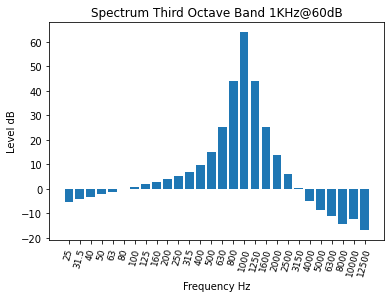

In [9]:
# Import useful packages
import matplotlib.pyplot as plt

print(Leq_3oct)

freqs = ['25', '31.5', '40', '50', '63', '80', '100', '125', '160', '200', '250', '315',
        '400', '500', '630', '800', '1000', '1250', '1600', '2000', '2500', '3150', '4000', '5000', '6300', '8000',
        '10000', '12500']
values = Leq_3oct

print(freqs)
        
# The figure  is created
fig = plt.figure ()
# The object inside the figure is created
ax = fig.add_subplot (1, 1, 1)

# Legend on the y axis
plt.ylabel ('Level dB')
# Legend on the x axis
plt.xlabel ('Frequency Hz')
# Graphic Title
plt.title ('Spectrum Third Octave Band 1KHz@60dB')

# Bar graph is created
ax.bar (freqs, values, color = "C0")
# Rotation of the x axis data
ax.set_xticklabels (freqs, rotation = 75, fontsize = 9)
# Show the graph 
plt.show()

### LAeq

This function is only available for calculation in frequency bands (_3oct).

Calculate the LAeq of the frequency bands you choose, returns the calculated LAeq values for each band. Each one is calculated with the levels (dBA) of its band in the different samples. This function uses the function Leq_3oct of the Mosqito, but instead of using dB values, dBA values are used. In order to convert dB into dBA we use an internal function of the Mosqito: A_weighting.

In [8]:
# Local imports
#ESTE FROM NO FUNCIONA, ARREGLAR LO DE LAS CARPETAS#################################
#from mosqito.functions.sound_level_meter.Leq_3oct import Leq_3oct
from Leq_3oct import Leq_3oct
from mosqito.functions.shared.A_weighting import A_weighting

ModuleNotFoundError: No module named 'Leq_3oct'

Take the input array and transform its values into dBA. The operation is performed with each of the values and they are stored in an empty array. This new array with the values in dBA will be the input array for the Leq_3oct function.

Returns LAeq_3oct, which is an array with as many values as there are frequency bands being operated. In this example there are 28 LAeq values.

Aquí iría el codigo que muestra el LAeq_3oct ////////////////////////////////////////////////////////////////////////////////
ejemplo de lo que se deberia ver


[-30.4/ -23.4/ -16.7/ -10.5/ -4.7/   0.6/   5.4/   9.8/  13.8/  17.5/  20.9/  23.9/
  26.6/  29.1/  31.4/  33.4/  35.2/  36.8/  38.1/  39.2/  40./   40.6/  41./   41.2/
  41.3/  41.2/  41./   40.5/  39.9/  38.9/  37.5/  35.7/  33.4/  30.7]

 ### LCeq
This function is only available for calculation in frequency bands (_3oct).

Calculate the LCeq of the frequency bands you choose, returns the calculated LCeq values for each band. Each one is calculated with the levels (dBC) of its band in the different samples. This function uses the function Leq_3oct of the Mosqito, but instead of using dB values, dBC values are used. In order to convert dB into dBC we use an internal function of the Mosqito: C_weighting.

In [ ]:
# Local imports
#ESTE FROM NO FUNCIONA, ARREGLAR LO DE LAS CARPETAS#################################
from mosqito.functions.sound_level_meter.Leq_3oct import Leq_3oct
from mosqito.functions.shared.C_weighting import C_weighting

In [11]:
# Empty list to keep the lists. Each list is the dBA values for each frequency band in a sample. 
signal_sample_A = []
# Take the lines of the array one by one and perform the function to transform the values in dB to dBA.
# Save dBA lists in the list "signal_sample_A". 
for i in range(spectrum_signal_samples.shape[0]):
    signal_sample_A.append(A_weighting(spectrum_signal_samples[i],freq))
    # Create an array in which each list of "signal_sample_A" is a line of the array. 
    spectrum_signal_samples_A = np.array(signal_sample_A)
    # Calculate Leq of each frequency bands with the new dBA values. 
    LAeq_3oct = Leq_3oct(spectrum_signal_samples_A, freq)

NameError: name 'A_weighting' is not defined

Take the input array and transform its values into dBC. The operation is performed with each of the values and they are stored in an empty array. This new array with the values in dBC will be the input array for the Leq_3oct function.

In [12]:
# Empty list to keep the lists. Each list is the dBC values for each frequency band in a sample.
signal_sample_C = []
# Take the lines of the array one by one and perform the function to transform the values in dB to dBC.
# Save dBC lists in the list "signal_sample_C".
for i in range(spectrum_signal_samples.shape[0]):
    signal_sample_C.append(C_weighting(spectrum_signal_samples[i],freq))
    # Create an array in which each list of "signal_sample_C" is a line of the array.
    spectrum_signal_samples_C = np.array(signal_sample_C)
    # Calculate Leq of each frequency bands with the new dBC values.
    LCeq_3oct = Leq_3oct(spectrum_signal_samples_C, freq)

NameError: name 'C_weighting' is not defined

Returns LCeq_3oct, which is an array with as many values as there are frequency bands being operated. In this example there are 28 LCeq values. 

Aquí iría el codigo que muestra el LCeq_3oct ////////////////////////////////////////////////////////////////////////////////
ejemplo de lo que se deberia ver


[-30.4/ -23.4/ -16.7/ -10.5/ -4.7/   0.6/   5.4/   9.8/  13.8/  17.5/  20.9/  23.9/
  26.6/  29.1/  31.4/  33.4/  35.2/  36.8/  38.1/  39.2/  40./   40.6/  41./   41.2/
  41.3/  41.2/  41./   40.5/  39.9/  38.9/  37.5/  35.7/  33.4/  30.7]

### Max_level
The function returns the value of the maximum level. This function has two ways to calculate:
    
    - 1. max_level_3oct: for the maximum value of each frequency band.
    - 2. max_level: for the maximum value of the time samples.
    
#####  max_level_3oct
Return the maximum value of the frequency bands you choose. Each one is calculated with the levels (dB) of its band in the different samples. The array is traversed row by row choosing the maximum value with the help of the function max(), then they are stored in an empty array. 

In [13]:
# Empty array to keep the levels (dB) of each one of the samples of a specific frequency band.
main_freq = np.zeros(spectrum_signal_samples.shape[1])
# Empty array to store the maximum values of each frequency band.
max_level_3oct = np.zeros(freq_3oct.shape[0])
# For each frequency band you perform the operation.
for i in range(freq_3oct.shape[0]):
    # Save the values of a frequency band.
    for j in range(spectrum_signal_samples.shape[1]):
        main_freq[j] = spectrum_signal_samples[i,j]
    # Calculate the maximum with the values.
    max_level_3oct[i] = max(main_freq)

Returns max_level_3oct, which is an array with as many values as there are frequency bands being operated. In this example there are 28 maximum values. 

[ 9.72795273 11.73178011 13.73718591 15.74474237 17.75770748 19.77881728
 21.8106451  23.86365606 25.9480569  28.08499947 30.30472111 32.65794018
 35.26619306 38.35441731 42.51657732 52.05799961 64.47387874 51.48124055
 41.64146552 36.83745473 32.92425462 29.58994153 26.33375145 23.38380838
 20.41512666 17.60442501 15.11485449 12.71764999]


<ipython-input-14-c47cac56033f>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels (freqs, rotation = 75, fontsize = 9)


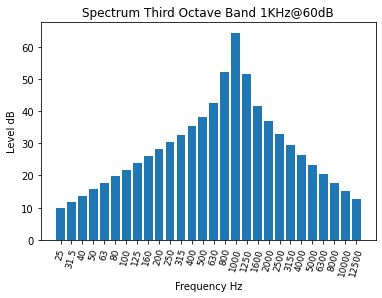

In [14]:
print(max_level_3oct)

freqs = ['25', '31.5', '40', '50', '63', '80', '100', '125', '160', '200', '250', '315',
        '400', '500', '630', '800', '1000', '1250', '1600', '2000', '2500', '3150', '4000', '5000', '6300', '8000',
        '10000', '12500']
values = max_level_3oct
        
# The figure  is created
fig = plt.figure ()
# The object inside the figure is created
ax = fig.add_subplot (1, 1, 1)

# Legend on the y axis
plt.ylabel ('Level dB')
# Legend on the x axis
plt.xlabel ('Frequency Hz')
# Graphic Title
plt.title ('Spectrum Third Octave Band 1KHz@60dB')

# Bar graph is created
ax.bar (freqs, values, color = "C0")
# Rotation of the x axis data
ax.set_xticklabels (freqs, rotation = 75, fontsize = 9)
# Show the graph 
plt.show()

#####  max_level
Return the maximum value of the series of levels (dB) collected over time (samples). Searches all samples and returns the highest level with the help of the max() function.


In [15]:
# Save the maximum level.
max_level = np.array(max(sig_dB))

Returns max_level, which is one value representative of the samples.

In [16]:
print(max_level)

64.60694546140881


### Min_level
The function returns the value of the minimum level. This function has two ways to calculate:
    
    - 1. min_level_3oct: for the minimum value of each frequency band.
    - 2. min_level: for the minimum value of the time samples.
    
#####  min_level_3oct
Return the minimum value of the frequency bands you choose. Each one is calculated with the levels (dB) of its band in the different samples. The array is traversed row by row choosing the minimum value with the help of the function min(), then they are stored in an empty array. 

In [17]:
# Third party imports
import numpy as np

# Empty array to keep the levels (dB) of each one of the samples of a specific frequency band.
main_freq = np.zeros(spectrum_signal_samples.shape[1])
# Empty array to store the minimum values of each frequency band.
min_level_3oct = np.zeros(freq_3oct.shape[0])
# For each frequency band you perform the operation.
for i in range(freq_3oct.shape[0]):
    # Save the values of a frequency band.
    for j in range(spectrum_signal_samples.shape[1]):
        main_freq[j] = spectrum_signal_samples[i,j]
    # Calculate the maximum with the values.
    min_level_3oct[i] = min(main_freq)

Returns min_level_3oct, which is an array with as many values as there are frequency bands being operated. In this example there are 34 minimum values because they have been calculated for all third octave bands. 

[-26.02059991 -26.02059991 -26.02059991 -26.02059991 -26.02059991
 -26.02059991 -26.02059991 -26.02059991 -26.02059991 -26.02059991
 -26.02059991 -26.02059991 -26.02059991 -26.02059991 -26.02059991
 -26.02059991 -26.02059991 -26.02059991 -26.02059991 -26.02059991
 -26.02059991 -26.02059991 -26.02059991 -26.02059991 -26.02059991
 -26.02059991 -26.02059991 -26.02059991]


<ipython-input-18-c163ee221179>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels (freqs, rotation = 75, fontsize = 9)


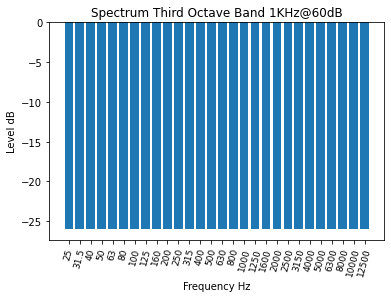

In [18]:
print(min_level_3oct)

freqs = ['25', '31.5', '40', '50', '63', '80', '100', '125', '160', '200', '250', '315',
        '400', '500', '630', '800', '1000', '1250', '1600', '2000', '2500', '3150', '4000', '5000', '6300', '8000',
        '10000', '12500']
values = min_level_3oct
        
# The figure  is created
fig = plt.figure ()
# The object inside the figure is created
ax = fig.add_subplot (1, 1, 1)

# Legend on the y axis
plt.ylabel ('Level dB')
# Legend on the x axis
plt.xlabel ('Frequency Hz')
# Graphic Title
plt.title ('Spectrum Third Octave Band 1KHz@60dB')

# Bar graph is created
ax.bar (freqs, values, color = "C0")
# Rotation of the x axis data
ax.set_xticklabels (freqs, rotation = 75, fontsize = 9)
# Show the graph 
plt.show()

#####  min_level
Return the minimum value of the series of levels (dB) collected over time (samples). Searches all samples and returns the lowest level with the help of the min() function.


In [19]:
# Save the minimum level.
min_level = min(sig_dB)

Returns min_level, which is one value representative of the samples.

In [20]:
print(min_level)

-11.54901959985743


### Percentile
The function returns the value of the percentiles. This function has two ways to calculate:
    
    - 1. LN_3oct: for the percentile value of each frequency band.
    - 2. LN: for the percentile value of the time samples.
    
#####  LN_3oct
Calculate the percentiles of the frequency bands you choose, returns the results for each frequency band.Take the values of a frequency band in the different samples and with those values calculate the percentile that you ask for with the help of the numpy.percentile() function.

In [21]:
# Empty array to keep the levels (dB) of each one of the samples of a specific frequency band.  
main_freq = np.zeros(spectrum_signal_samples.shape[1])

# Empty array to store the L90 values of each frequency band.
percentile_L90_3oct = np.zeros(freq_3oct.shape[0])

# For each frequency band you perform the operation.
for i in range(freq_3oct.shape[0]):
    # Save the values of a frequency band.
    for j in range(spectrum_signal_samples.shape[1]):
        main_freq[j] = spectrum_signal_samples[i,j]
        # Calculate the percentiles with the values. "q" of np.percentile = 100 - N (N of LN).
        L90 = np.percentile(main_freq, 10,interpolation='linear')
            
    # Save in each array the values corresponding to its percentile. Each value of the array line belongs
    # to a frequency band.
    percentile_L90_3oct[i] = L90
        

Returns, in this example,  percentile_L90, which is an array with as many values as there are frequency bands being operated. In this example there are 28 percentile values.

[-26.02049808 -26.02019363 -26.01897698 -26.01410625 -25.9945762
 -25.91646864 -25.61141929 -24.53573976 -21.67807536 -16.72897454
 -10.50642191  -3.53984381   4.19545927  13.2500017   24.98635598
  43.96289117  63.96993484  43.97152927  25.03166958  13.32253052
   4.40113158  -2.04516917  -9.93852446 -15.14938175 -16.99789125
 -20.59397137 -13.84819227 -19.20758803]


<ipython-input-23-fafa991f4295>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels (freqs, rotation = 75, fontsize = 9)


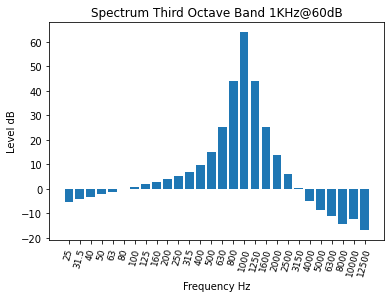

In [23]:
print(percentile_L90_3oct)

freqs = ['25', '31.5', '40', '50', '63', '80', '100', '125', '160', '200', '250', '315',
        '400', '500', '630', '800', '1000', '1250', '1600', '2000', '2500', '3150', '4000', '5000', '6300', '8000',
        '10000', '12500']
values = Leq_3oct
        
# The figure  is created
fig = plt.figure ()
# The object inside the figure is created
ax = fig.add_subplot (1, 1, 1)

# Legend on the y axis
plt.ylabel ('Level dB')
# Legend on the x axis
plt.xlabel ('Frequency Hz')
# Graphic Title
plt.title ('Spectrum Third Octave Band 1KHz@60dB')

# Bar graph is created
ax.bar (freqs, values, color = "C0")
# Rotation of the x axis data
ax.set_xticklabels (freqs, rotation = 75, fontsize = 9)
# Show the graph 
plt.show()

#####  LN
Return the percentile value of the series of levels (dB) collected over time (samples). Calculate the percentile you want to study from a series of levels (dB) collected over time (samples) with the help of the numpy.percentile() function.

In [ ]:
# Calculate the percentiles with the values. "q" of np.percentile = 100 - N (N of LN).
L90 = np.percentile(sig_dB, 10,interpolation='linear') 
L50 = np.percentile(sig_dB, 50,interpolation='linear') 
L25 = np.percentile(sig_dB, 75,interpolation='linear')

# Save the calculated percentile values.
percentiles = np.array([L25,L50,L90])

Returns percentiles, which is an array with all the percentiles that have been calculated.

In [ ]:
print(percentiles)